In [1]:
from scripts.visualise import *
from scripts.specificity import *

import pandas as pd
from datasets import load_dataset

from matplotlib.cm import get_cmap

# Settings

In [2]:
BASE_PATH = "data/hllmc2/"


EMBS_PATH = "embs/"
SIMS_PATH = "sims/"


MODEL_NAMES = [
    'human',
    'chatgpt',
    'Llama2-7B-Chat',
    'Llama2-13B-Chat',
    'Llama3.1-8B-Inst',
    'Qwen2.5-7B-Inst', 
    'Qwen2.5-14B-Inst',
    'DeepSeek-R1-8B',
    'DeepSeek-R1-14B',
]

ENCODER_NAMES = [
    "GIST-Embedding-v0",
    "styledistance",
]

SOURCES = [
    'medicine',
    "reddit_eli5",
    'finance', 
    'open_qa',
]

## Visualisation settings

In [3]:
plot_cmap_sem = get_cmap('Greys')
plot_colors_sem = [plot_cmap_sem((i)/(2+len(MODEL_NAMES))) for i in range(len(MODEL_NAMES))]
plot_patterns_sem = [
    None, # humans
    "|", # ChatGPT
]+[ # Llama 2
    "/", "\\"
]+[ # Llama 3
    "-"
]+[ # Qwen 
    "+", "x",
]+[ # DeepSeek
    "o", "O"
]

plot_patterns_style = [None]*9

plot_colors_style = [
    "white", # humans
    "#74AA9C", # ChatGPT
]+[ # Llama 2
    get_cmap("Blues")((1+i)/(2+np.sum(["Llama2" in m for m in MODEL_NAMES]))) for i in range(np.sum(["Llama2" in m for m in MODEL_NAMES]))
]+[ # Llama 3
    get_cmap("Reds")((1+i)/(2+np.sum(["Llama3" in m for m in MODEL_NAMES]))) for i in range(np.sum(["Llama3" in m for m in MODEL_NAMES]))
]+[ # Qwen 
    get_cmap("Purples")((1+i)/(2+np.sum(["Qwen2.5" in m for m in MODEL_NAMES]))) for i in range(np.sum(["Qwen2.5" in m for m in MODEL_NAMES]))
]+[
    get_cmap("Oranges")((1+i)/(2+np.sum(["DeepSeek" in m for m in MODEL_NAMES]))) for i in range(np.sum(["DeepSeek" in m for m in MODEL_NAMES]))
]

plot_patterns = [plot_patterns_sem, plot_patterns_style]
plot_colors = [plot_colors_sem, plot_colors_style]

/var/folders/k3/w73xhqj10c7_l7qt835scd4c0000gn/T/ipykernel_89015/1066901300.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plot_cmap_sem = get_cmap('Greys')
/var/folders/k3/w73xhqj10c7_l7qt835scd4c0000gn/T/ipykernel_89015/1066901300.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  get_cmap("Blues")((1+i)/(2+np.sum(["Llama2" in m for m in MODEL_NAMES]))) for i in range(np.sum(["Llama2" in m for m in MODEL_NAMES]))
/var/folders/k3/w73xhqj10c7_l7qt835scd4c0000gn/T/ipykernel_89015/1066901300.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotl

## Visualisation

In [4]:
data = load_dataset("noepsl/H-LLMC2")
df = data["train"].to_pandas()

/var/folders/k3/w73xhqj10c7_l7qt835scd4c0000gn/T/ipykernel_89015/4176807842.py:40: FutureWarning: The provided callable <function median at 0x108cbf920> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  curr_df_grouped =  curr_df_sims.groupby("source").agg(func=[
/var/folders/k3/w73xhqj10c7_l7qt835scd4c0000gn/T/ipykernel_89015/4176807842.py:40: FutureWarning: The provided callable <function median at 0x108cbf920> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  curr_df_grouped =  curr_df_sims.groupby("source").agg(func=[
/var/folders/k3/w73xhqj10c7_l7qt835scd4c0000gn/T/ipykernel_89015/4176807842.py:40: FutureWarning: The provided callable <function median at 0x108cbf920> is currently using SeriesGroupBy.median. In a future version of

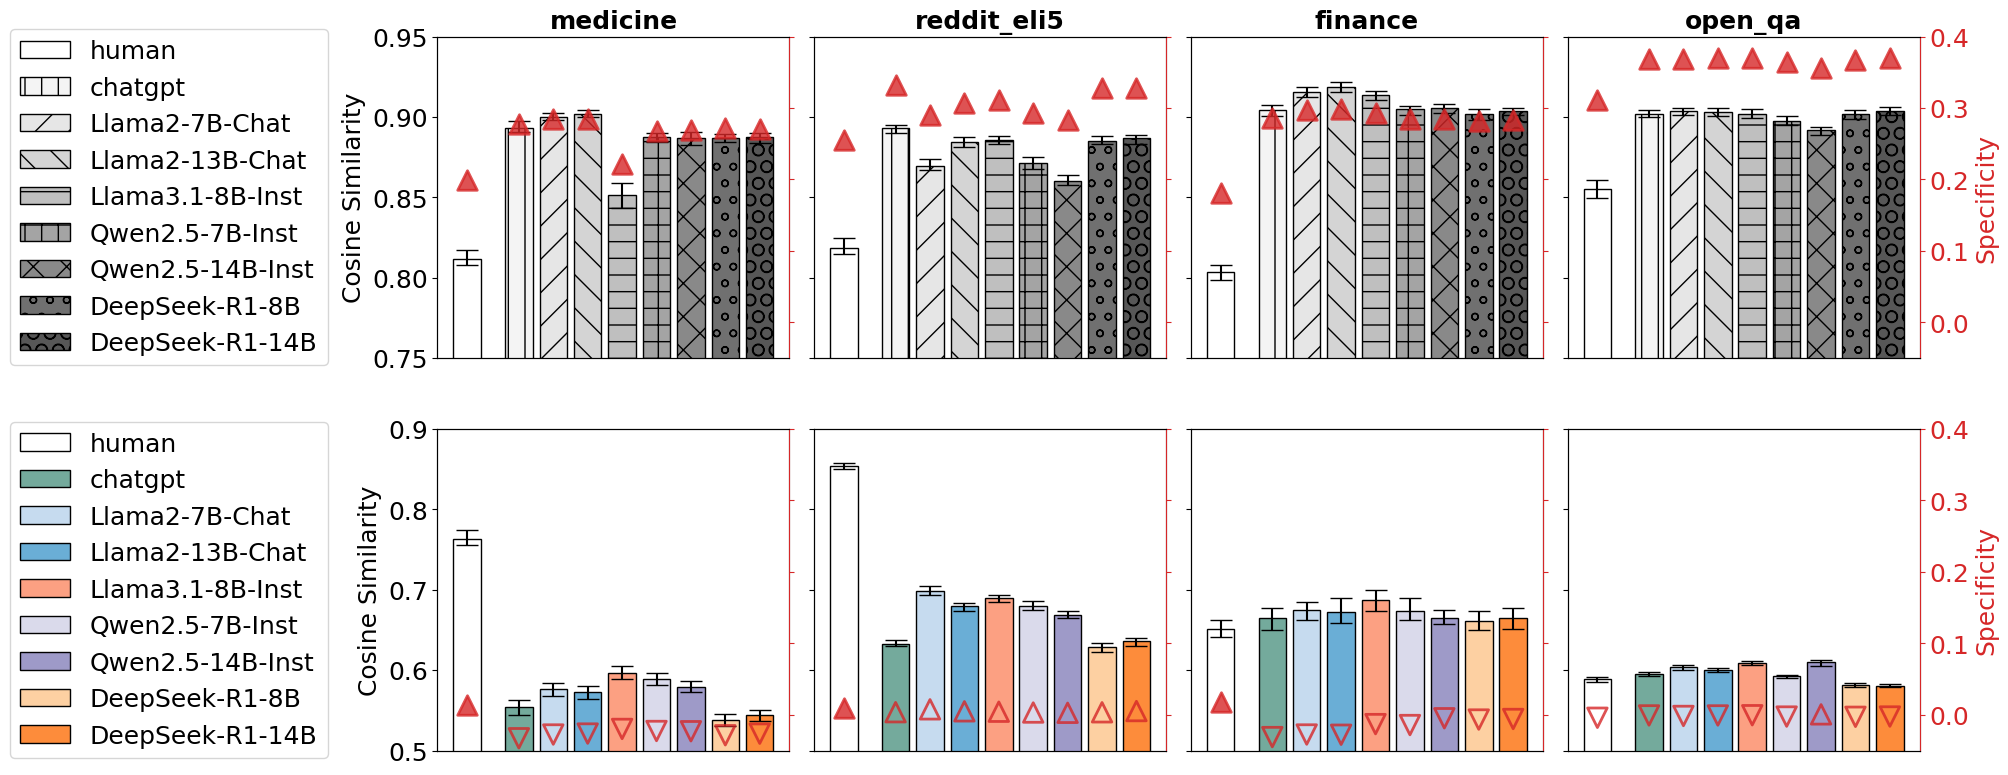

In [5]:
x_plot = [0]+list(np.arange(len(MODEL_NAMES)-1)+1.5)

bar_width = .8
capsize=8
fontsize = 18
ylabel="Cosine Similarity"

error_key = "median_bootstrap_CI"

sig_threshold = .05

sims_ylims = [[.75,.95], [.5,.9]]
# specs_ticks = np.arange(.9, 1.5, .1)
# specs_lims = [.95, 1.48]
specs_ticks = np.arange(-.1, .4+.1, .1)
specs_lims = [-.05, .4]

fig, axes = plt.subplots(
    nrows = len(ENCODER_NAMES),
    ncols = len(SOURCES),
    figsize=(20,8),
    sharex=True, sharey="row",
)

for i, encoder_name in enumerate(ENCODER_NAMES):
    
    curr_df_sims = pd.read_csv(f"{BASE_PATH}{SIMS_PATH}{encoder_name}.csv")
    curr_df_sims["source"] = df["source"]

    curr_sigs = get_sigs(
        curr_df_sims,
        comp_columns=[m for m in MODEL_NAMES if not m=="human"],
        col_prefix=f"{encoder_name}_sim_",
        split_by=("source", SOURCES),
        ref_column="human",
        sig_threshold = sig_threshold,
        labels_dict = {"greater":"˅","less":"˄"}
    )

    curr_df_grouped =  curr_df_sims.groupby("source").agg(func=[
            #np.mean, 
            #np.std, 
            #bootstrap_CI, 
            np.median, 
            #lambda x: np.median((1+np.array(x))/2),
            median_bootstrap_CI, 
            #iqr
        ]
    )
    
    curr_colors = plot_colors[i]
    curr_patterns = plot_patterns[i]

    for j, src in enumerate(SOURCES):
        heights = [
            curr_df_grouped[f"{encoder_name}_sim_{m}"].loc[src]["median"]
            for m in MODEL_NAMES
        ]
        errors = [
            curr_df_grouped[f"{encoder_name}_sim_{m}"].loc[src][error_key]
            for m in MODEL_NAMES
        ]

        axes[i][j] = single_barplot(
            ax=axes[i][j],
            x_plot=x_plot,
            heights=heights,
            errors=errors,
            colors=curr_colors,
            patterns=curr_patterns,
            fontsize=fontsize,
            #annotations = list([None]+curr_sigs[j]),
            labels=MODEL_NAMES
        )


        # Specificities
        ax_spec = axes[i][j].twinx()
        color_spec = 'tab:red'
        #ax_spec.plot(t, data2, color=color)
        ax_spec.tick_params(axis='y', labelcolor=color_spec)
        specificities = [
            specificity(
                embs_in=np.load(f"{BASE_PATH}{EMBS_PATH}{encoder_name}/question.npy")[np.where(curr_df_sims["source"]==src)[0]],
                embs_out=np.load(f"{BASE_PATH}{EMBS_PATH}{encoder_name}/{m}.npy")[np.where(curr_df_sims["source"]==src)[0]],
            )
            for m in MODEL_NAMES
        ]
        specs_means = [np.median(specs) for specs in specificities]
        specs_sigs = [
            wilcoxon(np.array(specs), alternative="greater").pvalue < sig_threshold
            for specs in specificities
        ]
        for spec_id in range(len(x_plot)):
            ax_spec.scatter(
                x_plot[spec_id], 
                specs_means[spec_id],
                #marker="*" if specs_sigs[spec_id] else "o", 
                marker = "^" if specs_means[spec_id]>0 else "v",
                color=color_spec,
                facecolors='none' if not specs_sigs[spec_id] else color_spec, 
                edgecolors=color_spec,
                lw=2,
                s=198,
                alpha=.8,
                clip_on = False
            )

        ax_spec.spines['right'].set_color(color_spec)
        ax_spec.tick_params(axis='y', colors=color_spec)

        # format 
        axes[i][j].set_xticks([])
        if i==0:
            axes[i][j].set_title(src, fontweight="semibold", fontsize=fontsize)

        if j==0:
            axes[i][j].yaxis.set_tick_params(labelsize=fontsize)
            axes[i][j].set_ylabel(ylabel, fontsize=fontsize)
            #axes[i][j].legend(loc='center left', bbox_to_anchor=(-1.65, 0.5), fontsize=fontsize)
            axes[i][j].legend(loc='center left', bbox_to_anchor=(-1.25, 0.5), fontsize=fontsize)

            ax_spec.set_yticks(ticks=specs_ticks, labels=[None]*len(specs_ticks))
        elif j==len(SOURCES)-1:
            ax_spec.set_ylabel('Specificity', fontsize=fontsize, color=color_spec)  # we already handled the x-label with ax1
            ax_spec.set_yticks(ticks=specs_ticks, labels=specs_ticks.round(1), fontsize=fontsize)
        else:
            ax_spec.set_yticks(ticks=specs_ticks, labels=[None]*len(specs_ticks))
        
        ax_spec.set_ylim(specs_lims)

    if i == 0:
        axes[i][j].set_ylim([.75,.95])
    elif i == 1:
        axes[i][j].set_ylim([.5,.9])
    

plt.tight_layout()
# plt.savefig(f"data/hllmc2/results/plots/cosine_spec.png", transparent=True, dpi=300)
# plt.savefig(f"data/hllmc2/results/plots/cosine_spec_uhd.png", transparent=True, dpi=1200)
# plt.savefig(f"data/hllmc2/results/plots/cosine_spec.svg", format="svg", bbox_inches="tight")#, dpi=300)
# plt.savefig(f"data/hllmc2/results/plots/cosine_spec.pdf", format="pdf", bbox_inches="tight")#, dpi=300)

plt.show()